# Multiple Linear Regression using SciKit-Learn
----   

In this tutorial, we have simply shifted the ZAR/USD column up one row. So now, we are trying to predict *next month's* exchange rate using *this month's* economic indicators.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('data_3.csv', index_col=0)
df.head()

,ZAR/USD (next month),Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Consumer Price Index
2008M01,7.66,5611.90,39356.82,8105.11,56841.94,1.92,29526.78,51547.61,37752.29,85.48
2008M02,7.97,6126.16,46946.33,8159.43,62527.78,2.01,29943.04,59702.31,45927.67,85.91
2008M03,7.79,6417.48,51150.89,8010.87,63851.12,2.05,30246.54,56448.18,42565.17,87.04
2008M04,7.62,7215.71,56174.34,9112.97,70944.49,2.03,30399.21,55534.75,43342.70,87.61
2008M05,7.92,7379.67,56240.45,9090.14,69275.97,2.10,30467.81,57682.89,46533.13,88.32


In [3]:
df.shape

(119, 10)

## Let's try to predict the (future) Rand/Dollar exchange rate   

Now that we have thinned out our DataFrame, let's see what we can do with machine learning.   
   

In [4]:
from sklearn.linear_model import LinearRegression

X = df.drop('ZAR/USD (next month)', axis=1)
y = df['ZAR/USD (next month)']

In [5]:
lm = LinearRegression()

In [6]:
#!conda update scikit-learn

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20,
                                                    shuffle=False)

In [9]:
y_test.head()

2015M12    16.37
2016M01    15.77
2016M02    15.39
2016M03    14.62
2016M04    15.38
Name: ZAR/USD (next month), dtype: float64

In [10]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2015M11']))

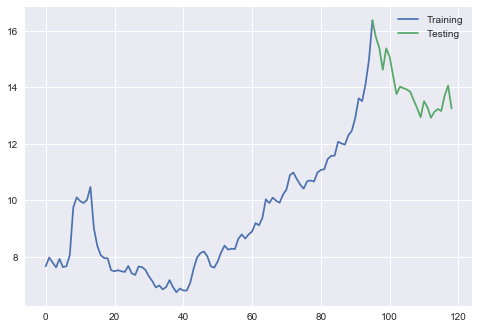

In [11]:
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()
plt.show()

In [12]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
b = float(lm.intercept_)

In [14]:
a = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [15]:
print("Intercept:", float(b))

Intercept: 8.44830841060896


In [16]:
a

,Coefficient
Value of Exports (USD),-0.000467
Value of Exports (ZAR),0.000063
Value of Imports (USD),-0.000562
Value of Imports (ZAR),0.000076
IMF Reserve Position (USD),-0.002439
Foreign Exchange (USD),-0.000036
Claims on Non-residents (USD),-0.000032
Liabilities to Non-residents (USD),0.000019
Consumer Price Index,0.011983


In [17]:
from sklearn import metrics

In [18]:
train_lm = lm.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

MSE (train)
Linear: 0.146562953598


In [19]:
test_lm = lm.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

MSE (test)
Linear: 1.94304738874


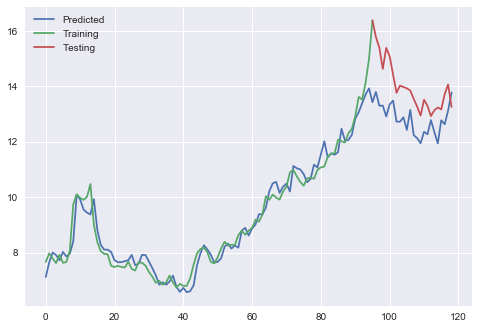

In [20]:
plt.plot(np.arange(len(y)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

----
**To summarise:**   
We learnt how to:
* use multiple linear regression to predict a future value of a response variable.   